In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import random
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Now we will declare and train our NN model

In [4]:
batch_size = 128
epochs = 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 99s 2ms/step - loss: 0.2576 - acc: 0.9199 - val_loss: 0.0584 - val_acc: 0.9811
Epoch 2/2
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0894 - acc: 0.9732 - val_loss: 0.0388 - val_acc: 0.9869
Test loss: 0.03875672715202672
Test accuracy: 0.9869


In [5]:
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train_fashion = x_train_fashion.reshape(x_train_fashion.shape[0], 1, img_rows, img_cols)
    x_test_fashion = x_test_fashion.reshape(x_test_fashion.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_fashion = x_train_fashion.reshape(x_train_fashion.shape[0], img_rows, img_cols, 1)
    x_test_fashion = x_test_fashion.reshape(x_test_fashion.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train_fashion = x_train_fashion.astype('float32')
x_test_fashion = x_test_fashion.astype('float32')
x_train_fashion /= 255
x_test_fashion /= 255
print('x_train_fashion shape:', x_train_fashion.shape)
print(x_train_fashion.shape[0], 'train samples')
print(x_test_fashion.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train_fashion = keras.utils.to_categorical(y_train_fashion, num_classes)
y_test_fashion = keras.utils.to_categorical(y_test_fashion, num_classes)

x_train_fashion shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Sample of MNIST Fashion dataset

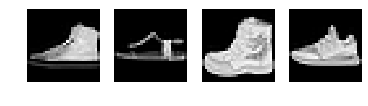

In [9]:
randidx = [random.randrange(1, len(x_train_fashion), 1) for _ in range(4)]
fig = plt.figure()
for i in range(len(randidx)):
    idx=randidx[i]
    fig.add_subplot(1,len(randidx),i+1)
    img = x_train_fashion[idx].reshape( (28, 28) )
    plt.imshow(img, cmap='gray')
    plt.axis('off')

In [6]:
batch_size_fashion = 128
epochs_fashion = 10

model_fashion = Sequential()
model_fashion.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_fashion.add(Conv2D(64, (3, 3), activation='relu'))
model_fashion.add(MaxPooling2D(pool_size=(2, 2)))
model_fashion.add(Dropout(0.25))
model_fashion.add(Flatten())
model_fashion.add(Dense(128, activation='relu'))
model_fashion.add(Dropout(0.5))
model_fashion.add(Dense(num_classes, activation='softmax'))

model_fashion.set_weights(model.get_weights()) 



for layer in model_fashion.layers[:-3]:
    layer.trainable = False
    
model_fashion.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_fashion.fit(x_train_fashion, y_train_fashion,
          batch_size=batch_size_fashion,
          epochs=epochs_fashion,
          verbose=1,
          validation_data=(x_test_fashion, y_test_fashion)) 

score = model_fashion.evaluate(x_test_fashion, y_test_fashion, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 622us/step - loss: 0.5427 - acc: 0.8163 - val_loss: 0.3674 - val_acc: 0.8656
Epoch 2/10
60000/60000 [==============================] - 37s 618us/step - loss: 0.3762 - acc: 0.8689 - val_loss: 0.3330 - val_acc: 0.8821
Epoch 3/10
60000/60000 [==============================] - 39s 642us/step - loss: 0.3374 - acc: 0.8802 - val_loss: 0.3083 - val_acc: 0.8889
Epoch 4/10
60000/60000 [==============================] - 39s 648us/step - loss: 0.3173 - acc: 0.8890 - val_loss: 0.2990 - val_acc: 0.8926
Epoch 5/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.3044 - acc: 0.8918 - val_loss: 0.2966 - val_acc: 0.8943
Epoch 6/10
60000/60000 [==============================] - 39s 655us/step - loss: 0.2938 - acc: 0.8949 - val_loss: 0.2875 - val_acc: 0.8966
Epoch 7/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.2822 - acc: 0.8990 - val_loss: 0.

### Class Labels : 
|Description|T-shirt/top | Trouser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle |
| -- | -- |  -- |  -- |  -- |  -- |  -- |  -- |  -- |  -- |  -- |
|Label | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |


Test loss: 0.2730671344995499
Test accuracy: 0.9039


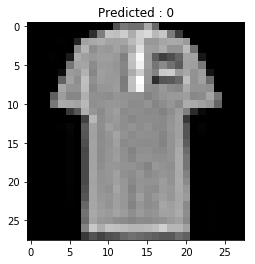

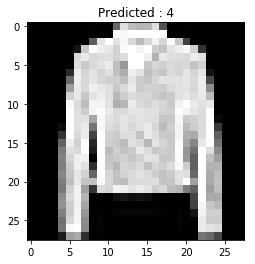

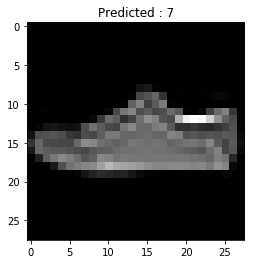

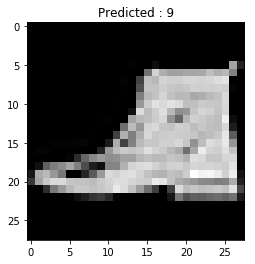

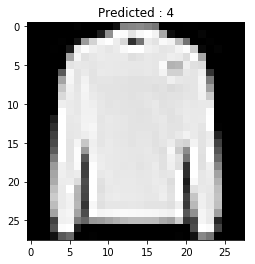

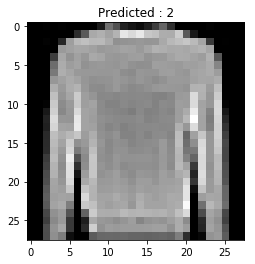

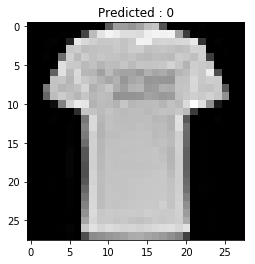

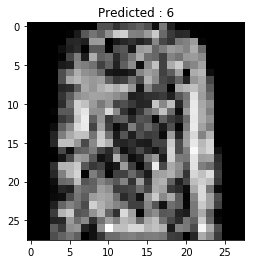

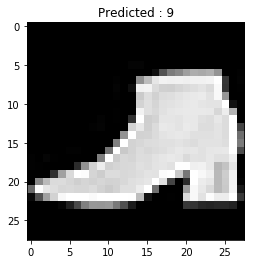

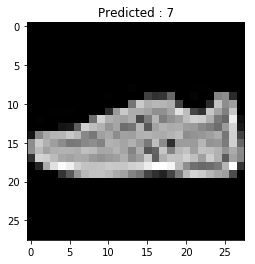

In [7]:
score = model_fashion.evaluate(x_test_fashion, y_test_fashion, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

randidx = [random.randrange(1, len(x_test), 1) for _ in range(10)]
pred = model_fashion.predict(x_test_fashion[randidx])

for i in range(len(randidx)):
    idx = randidx[i]
    img = x_test_fashion[idx].reshape( (28, 28) )
    plt.title("Predicted : " + str(np.argmax(pred[i])) )
    plt.imshow(img, cmap='gray')
    plt.show()